<a href="https://colab.research.google.com/github/EStalei/IC/blob/main/Agrupamento_Hier%C3%A1rquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agrupamento Hieráquico**

**Disciplina: Tópicos em Inteligência Computacional**

Instituto Federal do Norte de Minas Gerais Campus Montes Claros

Curso: Ciência da Computação

Professora: Luciana Balieiro Cosme

Aluno: Eike Stálei Vieira Neves

* [DATABASE](https://stackabuse.s3.amazonaws.com/files/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv)

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import io
from google.colab import files

uploaded = files.upload()
dt = pd.read_csv(io.BytesIO(uploaded['hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv']))

Saving hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv to hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv


In [5]:
dt.shape

(200, 5)

In [6]:
dt.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
 #Manteremos as colunas Renda anual (em milhares de dólares) e Pontuação de gastos (1-100). 
 #A coluna Spending Score indica a frequência com que uma pessoa gasta dinheiro em um 
 #shopping em uma escala de 1 a 100, sendo 100 o maior gastador. 

data = dt.iloc[:, 3:5].values

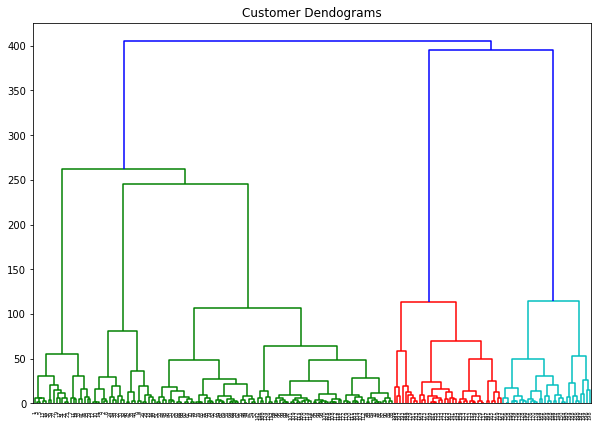

In [8]:
#Importamos a classe de hierarquia da scipy.clusterbiblioteca como shc. 
#A classe de hierarquia possui um dendrogrammétodo que obtém o valor retornado pelo linkagemétodo da mesma classe. 
#O linkagemétodo usa o conjunto de dados e o método para minimizar distâncias como parâmetros. 
#Usamos 'ward' como o, methoduma vez que minimiza as variações das distâncias entre os clusters.

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

Se desenharmos uma linha horizontal que atravessa a distância mais longa sem uma linha horizontal, obteremos 5 clusters, conforme mostrado na figura a seguir:

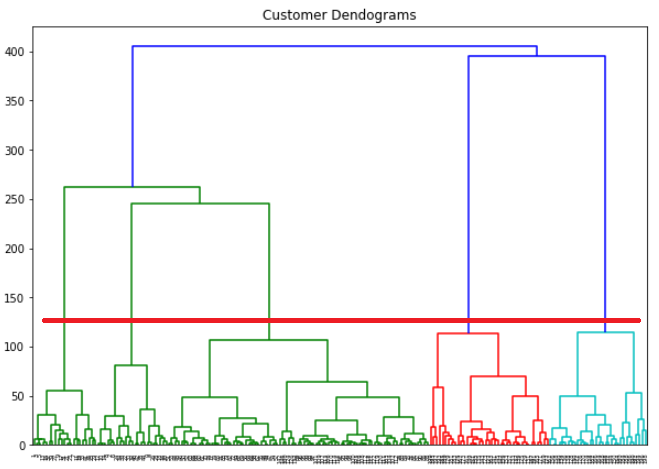

In [9]:
#Agora que sabemos o número de clusters para nosso conjunto de dados, a próxima etapa é 
#agrupar os pontos de dados nesses cinco clusters. 
#Para isso, usaremos novamente a AgglomerativeClusteringclasse da sklearn.clusterbiblioteca

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Como temos cinco clusters, temos cinco rótulos na saída, ou seja, de 0 a 4.

Como uma etapa final, vamos representar graficamente os clusters para ver como nossos dados foram realmente agrupados:

Text(0, 0.5, 'Gasto')

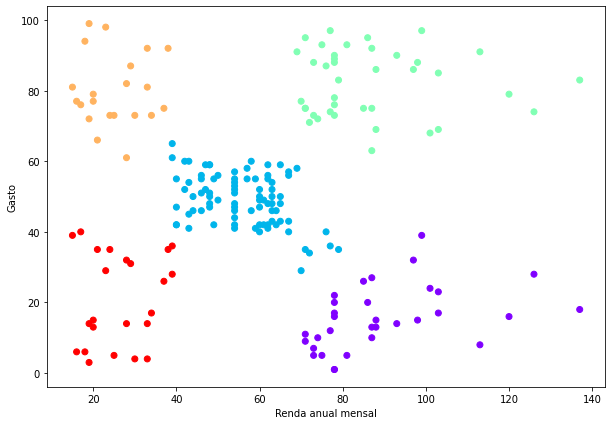

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel('Renda anual mensal')
plt.ylabel('Gasto')

Pdemos ver os pontos de dados na forma de cinco clusters. Os pontos em roxo pertencem aos clientes com altos salários, mas baixos gastos. Da mesma forma, os clientes no canto superior direito (pontos verdes), são os clientes com altos salários e altos gastos. Os clientes no meio (pontos de dados azuis) são aqueles com renda e gastos médios. O maior número de clientes pertence a esta categoria.

#**Completa e Manhattan**

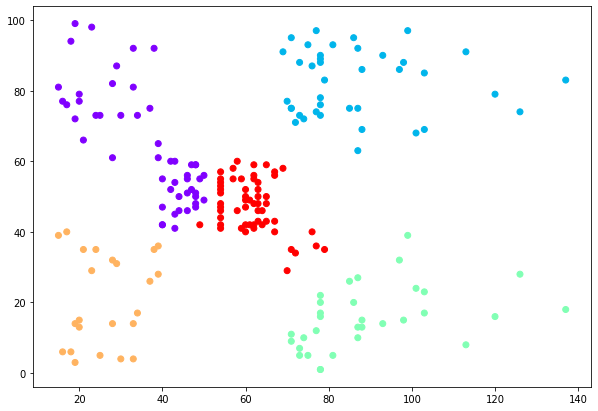

In [12]:
euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='complete')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')

# **Referências**

* [Hierarchical Clustering with Python and Scikit-Learn](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)